In [2]:
import numpy as np
import soundfile as sf

# Define Schroeder Allpass Filter

def schroeder_allpass(input_signal, delay, gain):
    delay_line = np.zeros(delay)
    output_signal = np.zeros_like(input_signal)
    for i, x in enumerate(input_signal):
        output_signal[i] = -gain * x + delay_line[-1] + gain * delay_line[0]
        delay_line = np.roll(delay_line, -1)
        delay_line[-1] = x
    return output_signal

# Define Schroeder Comb Filter

def schroeder_comb(input_signal, delay, gain):
    delay_line = np.zeros(delay)
    output_signal = np.zeros_like(input_signal)
    for i, x in enumerate(input_signal):
        output_signal[i] = x + gain * delay_line[-1]
        delay_line = np.roll(delay_line, -1)
        delay_line[-1] = output_signal[i]
    return output_signal

# Define Schroeder Reverb

def schroeder_reverb(input_signal, fs, rt60):
    # Define delay lengths
    allpass_delays = [347, 113, 37]  # in samples
    comb_delays = [1687, 1601, 2053, 2251]  # in samples

    # Calculate decay factors for 60dB decay
    allpass_gains = [0.7, 0.7, 0.7]
    comb_gains = [10 ** (-3 * d / (fs * rt60)) for d in comb_delays]

    # Apply allpass filters
    for delay, gain in zip(allpass_delays, allpass_gains):
        input_signal = schroeder_allpass(input_signal, delay, gain)

    # Apply comb filters
    output_signal = np.zeros_like(input_signal)
    for delay, gain in zip(comb_delays, comb_gains):
        output_signal += schroeder_comb(input_signal, delay, gain)

    return output_signal

# Load an audio file
source_signal, fs = sf.read('data/freeverb_dataset/dry/balloon_burst_1.wav')

# Apply Schroeder Reverb
output_signal = schroeder_reverb(source_signal, fs, rt60=1.2)  # rt60 is the reverb time in seconds

# Save the output audio file
sf.write('output.wav', output_signal, fs)

In [3]:
t = source_signal.shape[0]

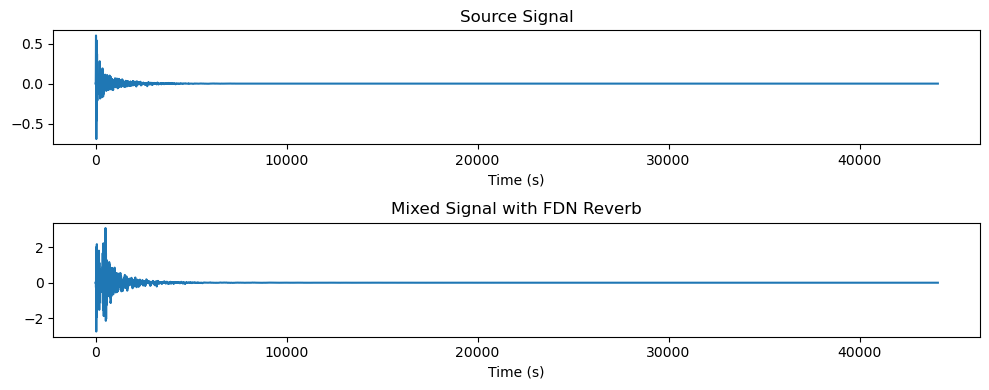

In [4]:
import matplotlib.pyplot as plt
# Plot the source signal and mixed signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(source_signal)
plt.title("Source Signal")
plt.xlabel("Time (s)")
plt.subplot(2, 1, 2)
plt.plot(output_signal)
plt.title("Mixed Signal with FDN Reverb")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()